# TP1 : quantification, histogramme et égalisation, interpolation, couleur

Dans ce TP, quelques images sont fournies, mais vous êtes fortement encouragés à récupérer et expérimenter sur d'autres images récupérées sur le web.

Les TP de traitement d'images seront réalisés en Python3, à l'aide de la librairie scikit-image. Les tableaux utilisés  (`ndarray`) par cette librairie pour manipuler les images proviennent de la librairie numpy. La documentation de ces deux librairies vous sera donc bien utile.

## Manipulation d'image

- Nous allons commencer par charger et afficher une image à l'aide du code ci-dessous.

<IPython.core.display.Javascript object>


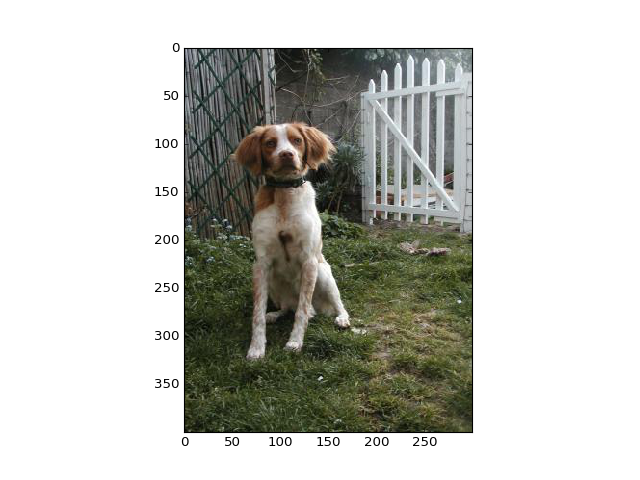

In [17]:
%matplotlib notebook
# la ligne précédente permet d'afficher les figures directement dans votre notebook et de pouvoir interagir avec

from skimage import io # on charge le module permettant d'ouvrir des images
import matplotlib.pyplot as plt # gestion des figures

im = io.imread('talvi.jpg')
plt.imshow(im)

- Les images sont manipulées sous forme de tableau à 2 (niveaux de gris) ou 3 dimensions (couleur). Le type python utilisé pour représenter ces tableaux est `ndarray` de la librairie numpy.

In [7]:
print("type de données utilisé:", type(im))
print("nombre de dimensions de l'image:",im.ndim)
print("dimensions:", im.shape)

type de données utilisé: <class 'numpy.ndarray'>
nombre de dimensions de l'image: 3
dimensions: (400, 300, 3)


**Question 1:** Expliquez les dimensions affichée pour l'image d'exemple.

**Question 2:** Le code suivant transforme l'image d'origine en niveau de gris. Modifiez le afin d'afficher les dimensions de la nouvelle image. Cela correspond-t-il à ce que vous attendez ? Y a-t-il une différence entre les deux méthodes utilisées ? (si oui) pourquoi ?

<IPython.core.display.Javascript object>


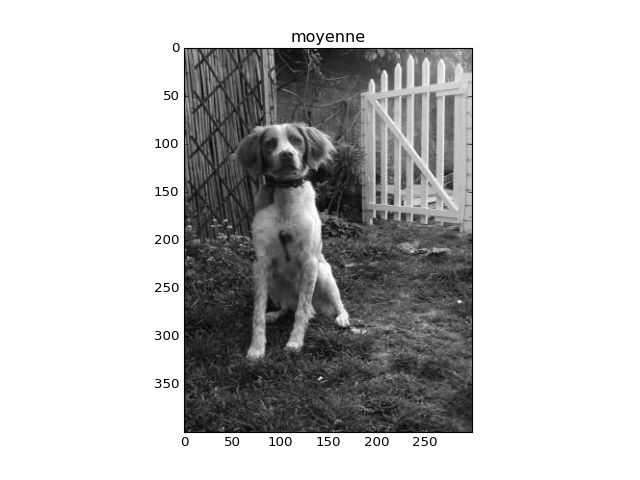

<IPython.core.display.Javascript object>


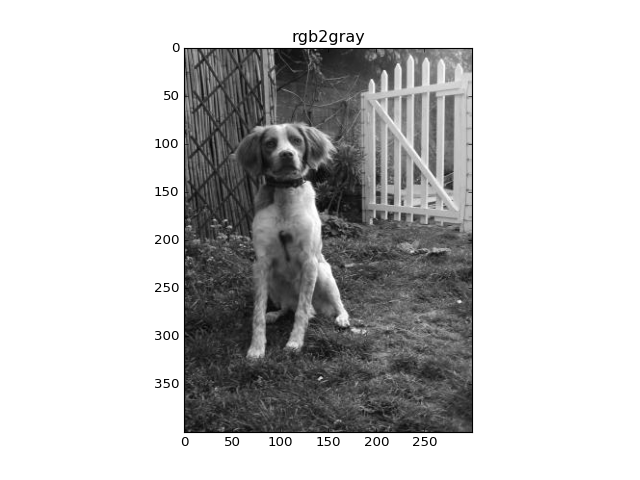

<IPython.core.display.Javascript object>


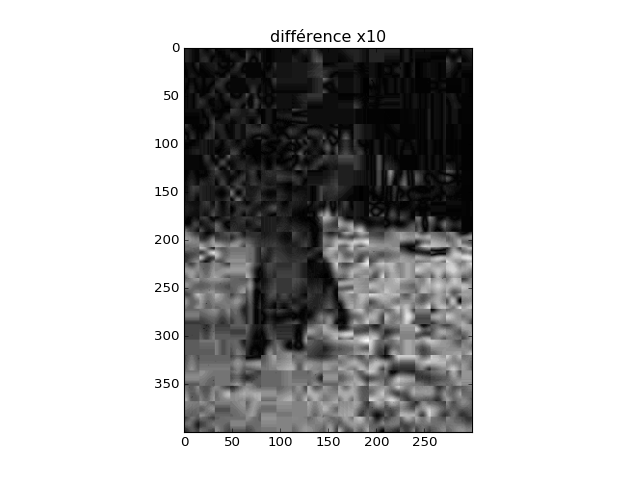

4.67900662861


In [8]:
from skimage import color # fonctions de conversion de couleur


# Traitement des images
im_gris1=im.mean(2)
im_gris2=color.rgb2grey(im)*255 #rgb2grey renvoie une image avec 0<= valeurs <=1
diff=abs(im_gris1-im_gris2)

# Affichage sous forme de différentes figures (attention les numéros de figure sont valables dans tout le notebook)
plt.figure(2)
plt.imshow(im_gris1, cmap=plt.cm.gray) # cmap=plt.cm.gray permet d'afficher les image en niveaux de gris avec la bonne palette
plt.title("moyenne")

plt.figure(3)
plt.imshow(im_gris2, cmap=plt.cm.gray)
plt.title("rgb2gray")

plt.figure(4)
print(diff.mean())
plt.imshow(diff, cmap=plt.cm.gray)
plt.title("différence x10")

## Quantification

### Comment ça marche ?

Fixer par exemple la variable `Q=8` pour le taux de quantification, puis lancer le script ci-dessous. Essayer pour diverse images (talvi, dégradés, etc.) et déterminer si, à Q identique la visibilité des dégradation dépend des images ou zones d'images.

<IPython.core.display.Javascript object>


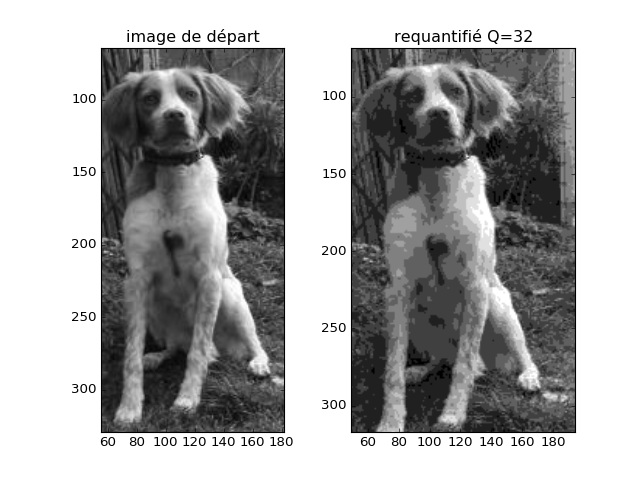

In [10]:
import numpy as np # manipulation des ndarray

# Init 
Q=32
im = io.imread('talvi.jpg')

# Traitements 
im_gris=color.rgb2grey(im)*255 
im_requantifiee = Q * np.round(im_gris/Q)

# Affichage
plt.figure()  #les numéros de figure ne sont pas obligatoires

plt.subplot(121) # 121 = 1 ligne, 2 colonnes, 1ère sous figure
plt.imshow(im_gris, cmap=plt.cm.gray)
plt.title("image de départ")

plt.subplot(122) # 122 = 1 ligne, 2 colonnes, 2ème sous figure
plt.imshow(im_requantifiee, cmap=plt.cm.gray)
plt.title("requantifié Q=" + str(Q))

**Question 3:** Visualiser l'effet de cette opération pour Q=2, puis Q=38 et Q=71.

**Question 4:** Montrer que cet algorithme réalise de la compression d'images avec perte.

### Comment mesurer la dégradation ?

**Question 5:** Cette dégration visuelle (évaluation subjective de votre part) est-t-elle perceptible pour des quantifications (`Q`) faibles ?

On pourrait qualifier objectivement et numériquement la dégradation par différentes mesures d'erreur (cf. code ci-dessous).

In [11]:
from skimage import measure # fonctions de mesure d'erreur

err_quad=measure.compare_mse(im_gris, im_requantifiee)
print("erreur quadratique moyenne (mse):", err_quad)
psnr=measure.compare_psnr(im_gris/255, im_requantifiee/255) # compare_psnr a besoin d'images avec des 0 <= valeur <=1
print("rapport signal bruit (psnr):", psnr)
ssim=measure.compare_ssim(im_gris, im_requantifiee)
print("similarité structurelle (ssim):", ssim)

erreur quadratique moyenne (mse): 85.6838949175
rapport signal bruit (psnr): 28.8018116095
similarité structurelle (ssim): 0.847096529359


**Question 6:** Chercher la signification de chacune de ces mesures. De quelle manière doit on les interpréter ? Correspondent elle à votre évaluation subjective ? Est-ce que cette fidélité depend des images / zones d'images ?

## Histogramme, seuillage

Le script ci-dessous calcule et affiche l'histogramme des niveaux de gris d'une image, après quantification uniforme en N boites.

** Question 7:** Essayez les trois cas `N=256`, `N=50` et `N=10`. Pour plusieurs images de votre choix, faire le lien entre les régions de l'histogramme et les régions de l'image.

<IPython.core.display.Javascript object>


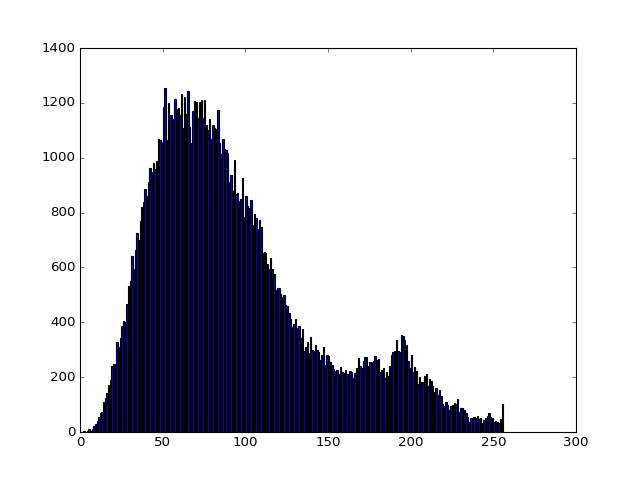

<Container object of 256 artists>

In [15]:
from skimage import exposure

N = 256 # Expérimenter avec d'autres valeurs
im = io.imread('talvi.jpg') # Expérimenter avec d'autres images
im_gris=color.rgb2grey(im)*255

(histo, bin_centers)=exposure.histogram(im_gris,N)
plt.figure()
plt.bar(np.arange(N), histo)

** Question 8: ** Que fait le petit script ci-dessous ? Quel est le rôle de la variable `SEUIL` (testez différentes valeurs) ?

** Question 9: ** Quel est le lien entre cette opération de seuillage et l'histogramme de l'image ? A quoi ressemble l'histogramme de l'image seuillée ? (vous pouvez ajouter du code pour l'afficher)

<IPython.core.display.Javascript object>


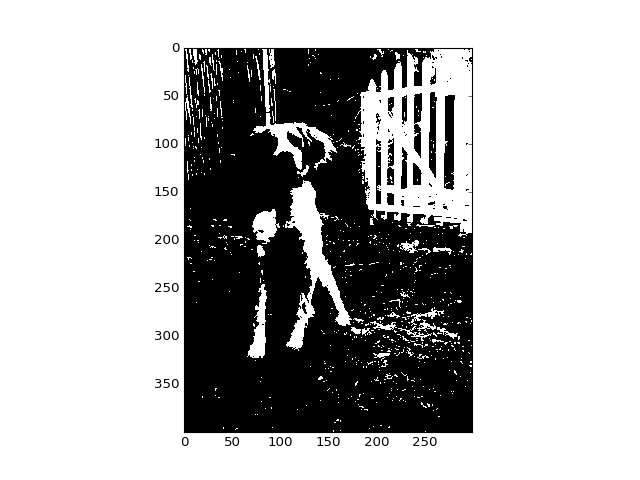

In [16]:
SEUIL = 128

# une double boucle (lente)  pour effectuer notre traitement sur chaque pixel
im_thresholded = np.zeros( im_gris.shape )
largeur = im_gris.shape[1]
hauteur = im_gris.shape[0]

for y in range(0, hauteur):
    for x in range(0, largeur):
        if im_gris[y][x] > SEUIL:
            im_thresholded[y][x] = 255
        else:
            im_thresholded[y][x] = 0

# On peut aussi remplacer la double boucle précédente par ceci
#im_thresholded = (im_gris > SEUIL)*255

plt.figure()
plt.imshow(im_thresholded, cmap=plt.cm.gray)

** Question 10: ** Dans une nouvelle cellule de script, adaptez le programme précédent pour réaliser un effet "inverse vidéo" sur l'image originale (un pixel de sortie doit être d'autant plus foncé qu'il n'était clair en entrée).

## Restauration par transformation de l'intensité : égalisation d'histogramme

L'objectif de cette opération est "d'améliorer" une image en transformant son contraste, c'est à dire d'exploiter "au mieux" la dynamique de luminance disponible.

**Question 11:** Exécuter le script ci-dessous et interprétez les résultats pour l'image `essai.jpg`.

<IPython.core.display.Javascript object>


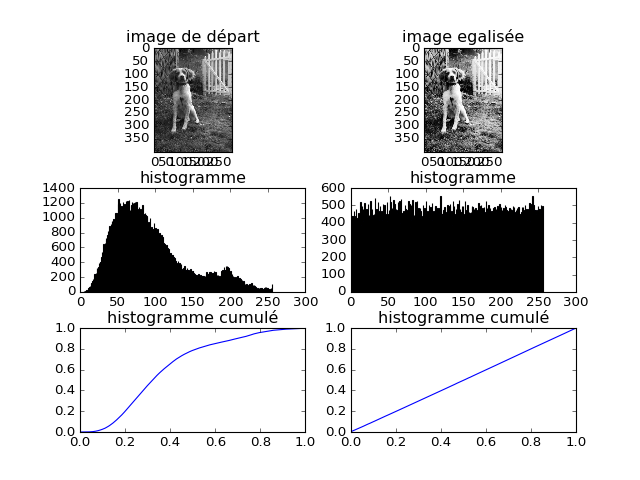

In [12]:
plt.rcParams['figure.subplot.hspace'] = 0.35 # espace un peu les sous-figures verticalement
from skimage import exposure
nb_bins=256

# Chargement de l'image
im = io.imread('talvi.jpg') # Expérimenter avec d'autres images
im_gris=color.rgb2grey(im)*255

# Histogramme normale et cumulé de l'image de départ
im_gris_histo, im_bins = exposure.histogram( im_gris, nb_bins )
im_gris_cumul, im_cumul_bins = exposure.cumulative_distribution( im_gris, nb_bins )

# Egalisation + histogramme
im_eq = exposure.equalize_hist(im_gris)
im_eq_histo, im_bins = exposure.histogram( im_eq, nb_bins )
im_eq_cumul, im_cumul_bins = exposure.cumulative_distribution( im_eq, nb_bins )

# Affichage
plt.figure()
plt.subplot(321)
plt.imshow(im_gris, cmap=plt.cm.gray)
plt.title("image de départ")

plt.subplot(322)
plt.imshow(im_eq, cmap=plt.cm.gray)
plt.title("image egalisée")

plt.subplot(323)
plt.bar(np.arange(nb_bins), im_gris_histo)
plt.title("histogramme")

plt.subplot(324)
plt.bar(np.arange(nb_bins), im_eq_histo)
plt.title("histogramme")

plt.subplot(325)
plt.plot(im_cumul_bins, im_gris_cumul )
plt.title("histogramme cumulé")

plt.subplot(326)
plt.plot(im_cumul_bins, im_eq_cumul )
plt.title("histogramme cumulé")

**Question 12**: Pourquoi l'histogramme après égalisation n'est il pas tout à fait plat ?

**Question 13:** Est-il correct d'affirmer que cette transformation s'éccrit sous la forme $I_{sortie}(x,y)=transformation(I_{entree}(x,y))$ ?

**Question 14:** La transformation opère-t-elle indépendamment sur chaque pixel ?

**Question 15:** La transformation est-elle linéaire ?

**Question 16:** S'adapte-t-elle automatiquement à l'image traitée ?

**Question 17:** Selon vous, quels sont les contenus d'images pour lesquels l'égalisation d'histogramme est très (ou très peu) efficace ? Tentez d'en trouver sur le web et de leur appliquer l'algorightme d'égalisation.

## Agrandissement d'image

La numérisation des images procède à une discrétisation spatiale, en posant une grille discrète de pixels sur une réalité initialement continue. De nombreuses tâches ont besoin de déterminer l'intensité de l'image en des coordonnées "non entières". Pour estimer cette intensité, on s'appuie souvent sur une hypothèse sur la fonction "luminance": sa continuité, continuité de sa dérivée, etc.

Le script ci-dessous agrandit une image selon deux méthodes : réplication et interpolation bilinéaire.

<IPython.core.display.Javascript object>


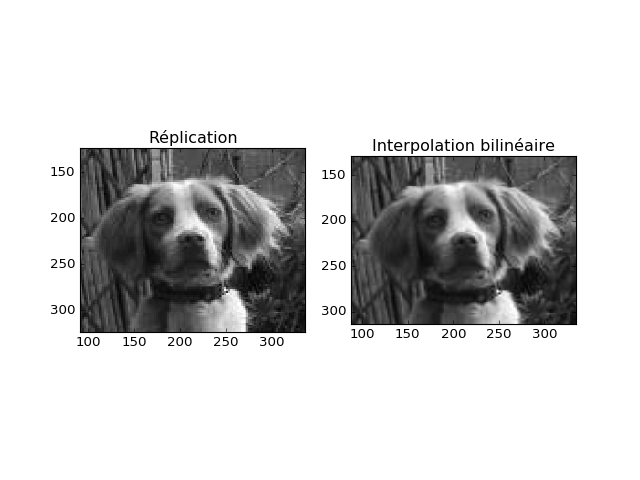

In [14]:
plt.rcParams['image.interpolation'] = 'nearest' # pour ne par faire d'interpolation lors du zoom sur les figures 
# Chargement de l'image
im = io.imread('talvi.jpg') # Expérimenter avec d'autres images
im_gris=color.rgb2grey(im)*255

largeur = im_gris.shape[1]
hauteur = im_gris.shape[0]

# Réplication
im_2x_replic = np.zeros( (hauteur*2,largeur*2) )

for y in range(0, hauteur):
    for x in range(0, largeur):
        xx=2*x
        yy=2*y
        
        im_2x_replic[yy][xx] = im_gris[y][x]
        im_2x_replic[yy][xx+1] = im_gris[y][x]
        im_2x_replic[yy+1][xx] = im_gris[y][x]
        im_2x_replic[yy+1][xx+1] = im_gris[y][x]
        
# Interpolation bilinéaire
im_2x_bilin = np.zeros( (hauteur*2,largeur*2) )

for y in range(0, hauteur-1):
    for x in range(0, largeur-1):
        xx=2*x
        yy=2*y
        
        im_2x_bilin[yy][xx] = im_gris[y][x]
        im_2x_bilin[yy][xx+1] = 0.5*(im_gris[y][x]+im_gris[y][x+1])
        im_2x_bilin[yy+1][xx] = 0.5*(im_gris[y][x]+im_gris[y+1][x])
        im_2x_bilin[yy+1][xx+1] = 0.25*(im_gris[y][x]+im_gris[y][x+1]+im_gris[y+1][x]+im_gris[y+1][x+1])
        
# Affichage
plt.figure()

plt.subplot(121)
plt.imshow(im_2x_replic, cmap=plt.cm.gray)
plt.title("Réplication")

plt.subplot(122)
plt.imshow(im_2x_bilin, cmap=plt.cm.gray)
plt.title("Interpolation bilinéaire")

**Question 18**: Comparez la complexité algorithmique des deux méthodes et leur rendu visuel (zoomez sur des parties bien contrastées de l'image)

**Question 19**: Comment faire une interpolation bilinéaire pour un zoom d'un facteur plus élevé que 2 ? (proposez une modification de l'algorithm initial)

**Question 20**: Comment réduire par 2 les dimensions d'une image ? (proposez et mettez en oeuvre deux méthodes : l'une naive, et l'autre prenant en compte les considérations spectrales vues en traitement du signal)

Running using Python 3.5.2 |Continuum Analytics, Inc.| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
Testing Python version-> py3.5 OK
Testing numpy...      -> numpy OK
Testing scipy ...     -> scipy OK
Testing matplotlib... -> pylab OK
Testing sympy         -> sympy OK
Testing pytest        -> pytest OK
